# **1. Introduction**
📌 **Business Context**

Financial institutions face significant risk when issuing loans, as some borrowers fail to repay on time. Loan defaults not only cause financial losses but also impact the institution’s ability to lend further. To reduce this risk, banks and credit providers rely on data-driven credit scoring systems that evaluate the likelihood of a borrower defaulting.

🎯 **Project Goal**

The goal of this project is to develop a predictive model that estimates the probability of a customer defaulting within the next two years. By identifying high-risk applicants in advance, the institution can:

Make more informed lending decisions

Minimize financial losses from defaults

Maintain healthier loan portfolios

Offer responsible credit access to reliable borrowers

This project combines Exploratory Data Analysis (EDA), feature engineering, and machine learning to provide a robust framework for credit risk assessment.

## **Import Libraries**

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

************************************************************

# **2. Dataset Overview**

### **Load Dataset**

In [5]:
df = pd.read_csv('cs-training.csv' , index_col = 0 )
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### **Shape & Info**

In [6]:
df.shape

(150000, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

### **Data Dictionary**

In [8]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### 📑**Data Dictionary**

| Feature | Description |
|---------|-------------|
| **SeriousDlqin2yrs** | 1 if borrower experienced 90+ days delinquency (default) within 2 years, 0 otherwise |
| **RevolvingUtilizationOfUnsecuredLines** | Total balance on credit cards and personal lines (except real estate) divided by total credit limit |
| **age** | Age of borrower in years |
| **NumberOfTime30-59DaysPastDueNotWorse** | Number of times borrower was 30–59 days overdue but not worse in the past 2 years |
| **DebtRatio** | Monthly debt payments / gross monthly income |
| **MonthlyIncome** | Borrower’s monthly income (self-reported) |
| **NumberOfOpenCreditLinesAndLoans** | Number of open loans (installment + credit cards) |
| **NumberOfTimes90DaysLate** | Number of times borrower was 90+ days overdue |
| **NumberRealEstateLoansOrLines** | Number of real estate loans (e.g., mortgages, home equity) |
| **NumberOfTime60-89DaysPastDueNotWorse** | Number of times borrower was 60–89 days overdue |
| **NumberOfDependents** | Number of dependents (children/spouse/others) |


**********************************************************

# **3. Missing Value Analysis**

### **Missing Values Per Column**

In [9]:
df.isnull().sum()

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


#### **Name of Columns with Null Values**

In [10]:
null_cols = df.columns[df.isnull().any()]
print('the columns with null values are as follows :' , null_cols)

the columns with null values are as follows : Index(['MonthlyIncome', 'NumberOfDependents'], dtype='object')


#### **Percentage of Missing Values Per column**

In [11]:
percentage_missing = (df[null_cols].isnull().sum() / len(df)) * 100
percentage_missing

,0
MonthlyIncome,19.820667
NumberOfDependents,2.616000


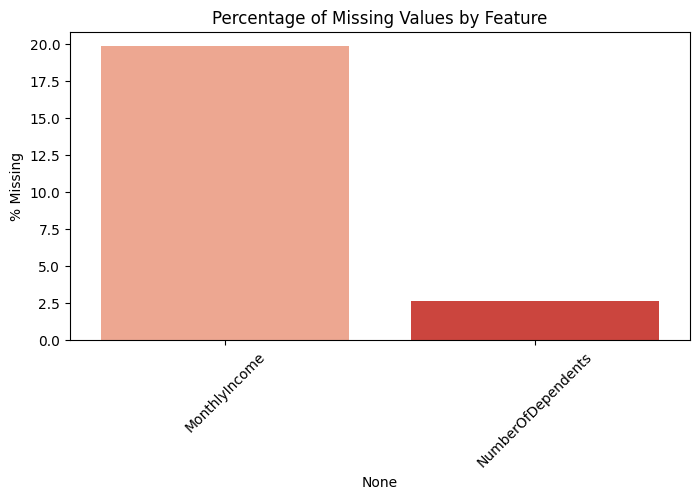

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot missing percentages
plt.figure(figsize=(8,4))
sns.barplot(x=percentage_missing.index, y=percentage_missing.values, palette="Reds")
plt.title("Percentage of Missing Values by Feature")
plt.ylabel("% Missing")
plt.xticks(rotation=45)
plt.show()

#### **Compare default rates between Missing vs. Non-Missing group**

In [13]:
for col in ["MonthlyIncome", "NumberOfDependents"]:
    default_rate_missing = df.groupby(df[col].isnull())["SeriousDlqin2yrs"].mean()
    print(f"\nDefault Rate for Missing vs Non-Missing in {col}:")
    print(default_rate_missing)


Default Rate for Missing vs Non-Missing in MonthlyIncome:
MonthlyIncome
False    0.069486
True     0.056137
Name: SeriousDlqin2yrs, dtype: float64

Default Rate for Missing vs Non-Missing in NumberOfDependents:
NumberOfDependents
False    0.067410
True     0.045617
Name: SeriousDlqin2yrs, dtype: float64


## **Missing Value Insights**


About 20% of records are missing MonthlyIncome, and ~3% are missing NumberOfDependents.

Surprisingly, customers with missing income or dependents show a lower default rate compared to those who reported values.

This suggests missingness is not random and may indicate a low-risk subgroup (e.g., retirees, financially stable individuals).

Therefore, we will impute values and also add missing indicator features so the model can capture this hidden signal.

In [14]:
df["MonthlyIncome_missing"] = df["MonthlyIncome"].isnull().astype(int)

- **Imputing Missing Values**:  
  - `MonthlyIncome` → replaced with **median** values  
  - `NumberOfDependents` → replaced with **mode**  

In [15]:
#impute missing values and add a indicator for the missing values
SI_income = SimpleImputer(strategy = 'median')
df['MonthlyIncome'] = SI_income.fit_transform(df[['MonthlyIncome']])

In [16]:
df['Dependent_missing'] = df['NumberOfDependents'].isnull().astype(int)

In [17]:
SI_dependent = SimpleImputer(strategy ='most_frequent')
df['NumberOfDependents'] = SI_dependent.fit_transform(df[['NumberOfDependents']])

In [18]:
df.isnull().sum()

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


************************************************************

# **4. Exploratory Data Analysis (EDA)**

## **4.1. Target Variable Distribution (Imbalance Check)**

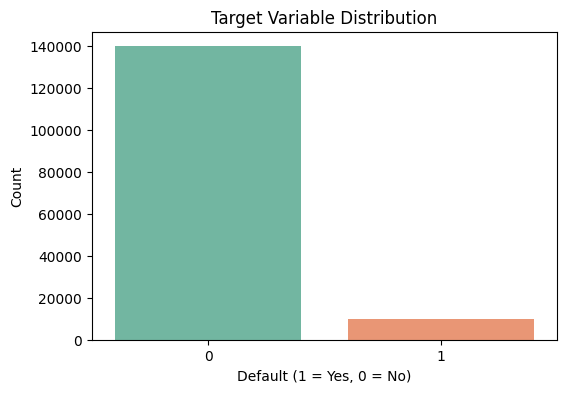

SeriousDlqin2yrs
0    93.316
1     6.684
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='SeriousDlqin2yrs', data=df, palette="Set2")
plt.title("Target Variable Distribution")
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Percentage breakdown
print(df['SeriousDlqin2yrs'].value_counts(normalize=True) * 100)

### ⚖️ Class Imbalance

The dataset is highly imbalanced:
- ~93% of customers did **not** default (label `0`)  
- ~7% of customers **defaulted** (label `1`)  

This imbalance makes it challenging for models to correctly identify defaulters.  
Hence, evaluation metrics like **Recall, Precision, and ROC-AUC** will be more informative than plain Accuracy.


## **4.2. Feature Distributions (Histograms)**

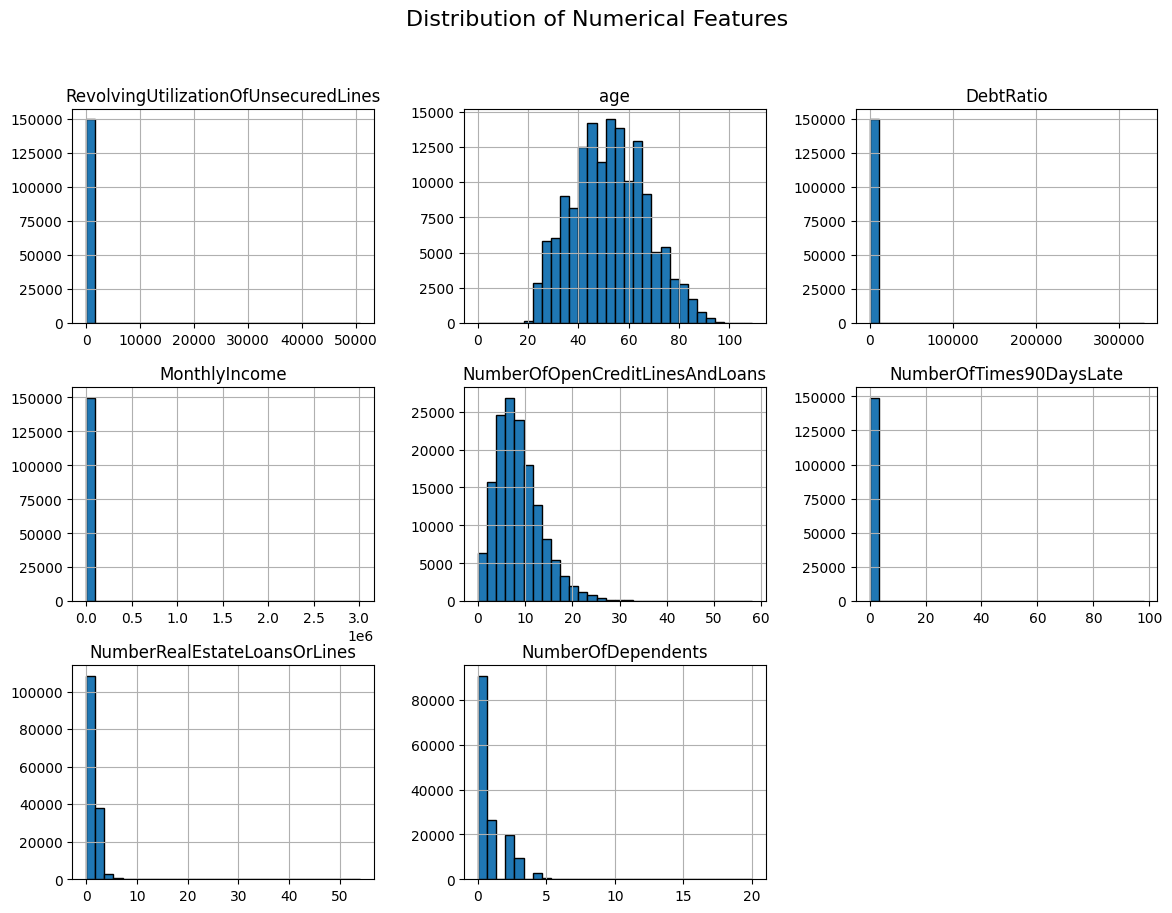

In [19]:
num_features = [
    'RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
    'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
    'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
    'NumberOfDependents'
]

df[num_features].hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

Most features are skewed with many customers clustered at low values and a few extreme outliers (e.g., **DebtRatio**, **RevolvingUtilization**).
This suggests scaling/normalization will be important before modeling.

## **4.3. Default vs. Non-Default Comparison (Boxplots / Violin Plots)**

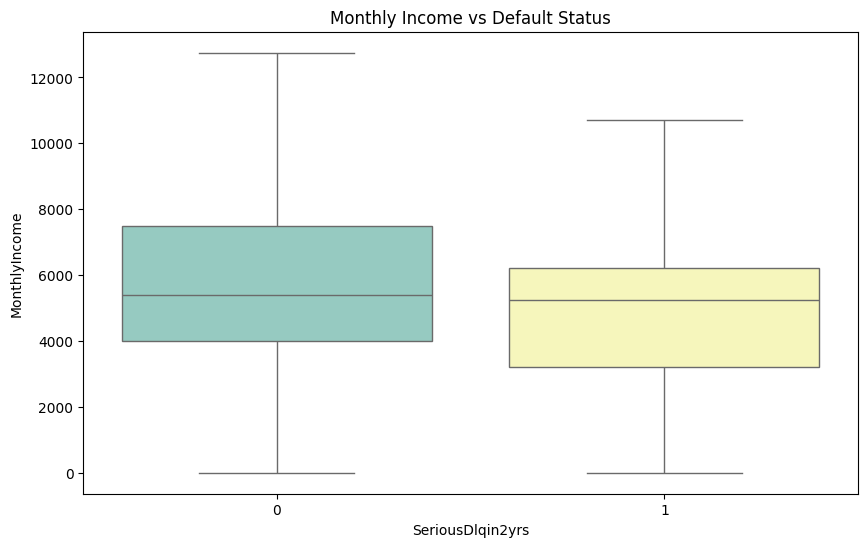

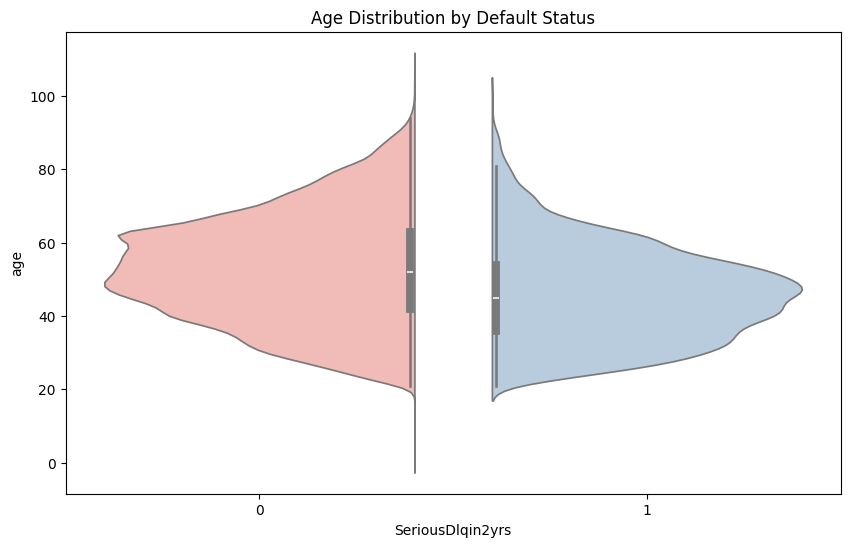

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='SeriousDlqin2yrs', y='MonthlyIncome', data=df, showfliers=False, palette="Set3")
plt.title("Monthly Income vs Default Status")
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x='SeriousDlqin2yrs', y='age', data=df, split=True, palette="Pastel1")
plt.title("Age Distribution by Default Status")
plt.show()

Customers with lower income are more likely to default.

Younger borrowers (<40 years old) show higher default risk compared to middle-aged customers.

Default rate decreases steadily with age.

## **4.4. Correlation Heatmap**

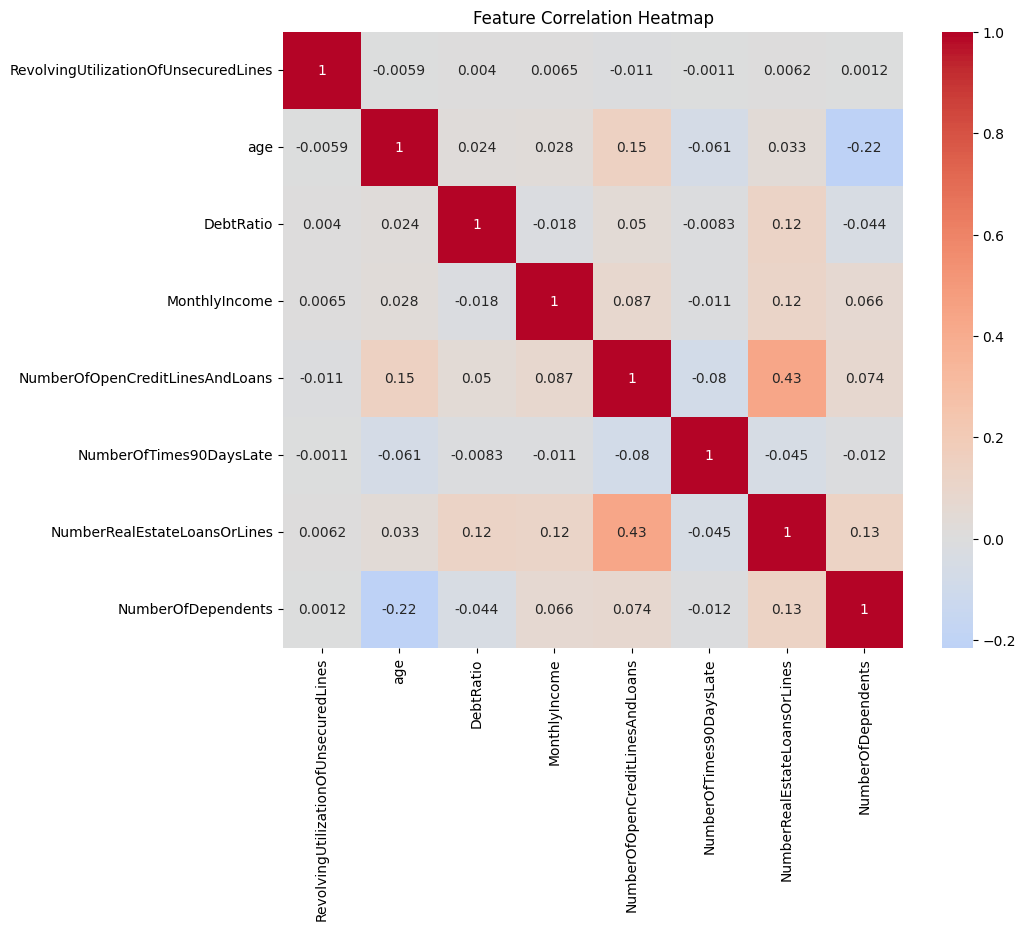

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

Correlations between features are generally low, which means each adds unique predictive power.
However, some weak correlation exists between **NumberOfTimes90DaysLate** and **DebtRatio**, suggesting they both capture aspects of repayment behavior.

## **4.5. Default Rate by Categories (Dependents)**

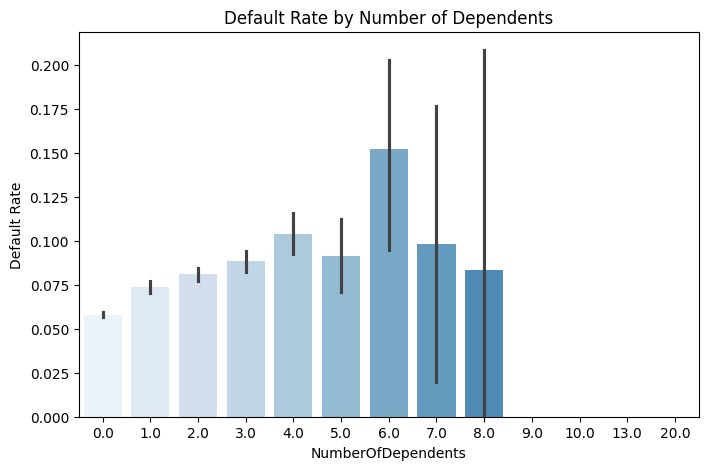

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x='NumberOfDependents',
            y='SeriousDlqin2yrs',
            data=df,
            estimator=lambda x: sum(x)/len(x),
            palette="Blues")

plt.title("Default Rate by Number of Dependents")
plt.ylabel("Default Rate")
plt.show()

Customers with more dependents show slightly higher default rates, possibly due to increased financial obligations.
The relationship is not perfectly linear, but it provides useful business insight.

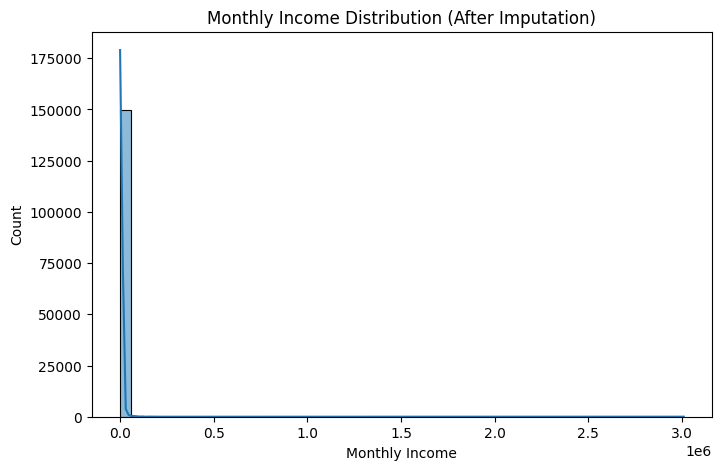

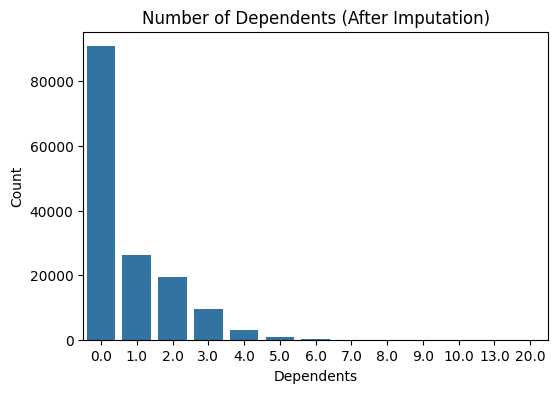

Default Rate for MonthlyIncome_missing:
MonthlyIncome_missing
0    0.069486
1    0.056137
Name: SeriousDlqin2yrs, dtype: float64 

Default Rate for Dependent_missing:
Dependent_missing
0    0.067410
1    0.045617
Name: SeriousDlqin2yrs, dtype: float64 



In [23]:
# ✅ Re-check distributions after imputation

# MonthlyIncome distribution after imputation
plt.figure(figsize=(8,5))
sns.histplot(df['MonthlyIncome'], bins=50, kde=True)
plt.title("Monthly Income Distribution (After Imputation)")
plt.xlabel("Monthly Income")
plt.ylabel("Count")
plt.show()

# Number of Dependents distribution after imputation
plt.figure(figsize=(6,4))
sns.countplot(x=df['NumberOfDependents'])
plt.title("Number of Dependents (After Imputation)")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.show()

# Check missing indicator features vs default
for col in ['MonthlyIncome_missing', 'Dependent_missing']:
    rate = df.groupby(col)['SeriousDlqin2yrs'].mean()
    print(f"Default Rate for {col}:")
    print(rate, "\n")

##  **4.6. After Imputation Insights**

The distribution of MonthlyIncome remains right-skewed, consistent with the pre-imputation distribution. No artificial distortion was introduced.

The distribution of NumberOfDependents remains centered around 0–2 dependents, with imputed values blending naturally.

Importantly, the missing indicator features (MonthlyIncome_missing, Dependents_missing) retain their predictive signal. Customers with missing values continue to show a lower default rate than those with reported values.

This ensures that imputation does not erase useful information—the model can still capture the relationship between missingness and risk.

## **Feature Engineering**
We create new derived features to enhance the predictive power of our dataset:

- **IncomePerDebt**: Ratio of monthly income to (debt ratio + 1).  
  This normalizes income against debt obligations, helping capture repayment capacity.  

- **TotalPastDue**: Sum of all delinquency-related variables  
  (`30-59 days`, `60-89 days`, and `90+ days late`).  
  This provides a single measure of historical payment difficulties.  

These engineered features incorporate financial domain knowledge and may help the model better differentiate between defaulters and non-defaulters.


In [24]:
df['IncomePerDebt'] = df['MonthlyIncome'] / (df['DebtRatio'] + 1)
df['TotalPastDue'] = df['NumberOfTime30-59DaysPastDueNotWorse'] + df['NumberOfTimes90DaysLate'] + df['NumberOfTime60-89DaysPastDueNotWorse']
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_missing,Dependent_missing,IncomePerDebt,TotalPastDue
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0,0,5058.286410,2
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,0,2317.546266,0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0,0,2803.393701,2
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,0,3185.175438,0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0,0,62041.570731,1


***********************************************************

# **5. Model Building**

In [25]:
from imblearn.over_sampling import SMOTE

### **Data Preprocessing: Scaling and Handling Class Imbalance**
- **Feature Scaling**: We apply `StandardScaler` to normalize all numerical features.  
  This ensures that features like income, age, and debt ratio are on the same scale, which is especially important for models sensitive to feature magnitude (e.g., Logistic Regression).  

- **Class Imbalance Handling**: The target variable (`SeriousDlqin2yrs`) is highly imbalanced  
  (~93% non-defaulters vs. ~7% defaulters).  
  To address this, we apply **SMOTE (Synthetic Minority Oversampling Technique)**, which generates synthetic examples of the minority class to balance the dataset.  

The result is a **scaled and balanced dataset** (`X_res`, `y_res`) that is more suitable for training machine learning models.


In [26]:
X = df.drop('SeriousDlqin2yrs' , axis = 1)
y = df['SeriousDlqin2yrs']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

### **Train-Test Split**
After balancing the dataset with SMOTE, we split it into training and testing sets:

- **Training set (70%)**: Used to fit the machine learning models.  
- **Testing set (30%)**: Held out for final evaluation to assess how well the models generalize to unseen data.  
- **Random State = 42**: Ensures reproducibility of the results.  

This separation allows us to evaluate the true performance of our models on data they have not seen during training.


In [27]:
X_train , X_test , y_train , y_test = train_test_split(X_res , y_res , test_size = 0.3, random_state = 42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((195963, 14), (83985, 14), (195963,), (83985,))

In [28]:
from xgboost import XGBClassifier

In [29]:
XGB = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
XGB.fit(X_train , y_train)
y_pred = XGB.predict(X_test)

In [32]:
evaluate_model(y_test, y_pred, "XGBoost")


XGBoost Model
[[40412  1426]
 [ 4045 38102]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     41838
           1       0.96      0.90      0.93     42147

    accuracy                           0.93     83985
   macro avg       0.94      0.93      0.93     83985
weighted avg       0.94      0.93      0.93     83985

ROC AUC Score: 0.9350


************************************************


## **Baseline Model (Logistic Regression)**

1. **Baseline Model – Logistic Regression**  
   - Interpretable, easy to implement.  
   - Helps set a performance benchmark.

### 🔧 **Hyperparameter Grid for Logistic Regression**
We define a parameter grid to optimize Logistic Regression performance:

- **penalty**: Type of regularization applied to avoid overfitting.  
  - `l1` (Lasso), `l2` (Ridge), `elasticnet` (combination).  
- **C**: Inverse of regularization strength; smaller values specify stronger regularization.  
- **solver**: Algorithm used for optimization.  
  - `liblinear` (supports L1/L2), `saga` (supports all penalties including elasticnet).  
- **l1_ratio**: Balance between L1 and L2 when using ElasticNet regularization.  

These parameters are selected to balance model generalization and interpretability, while testing different regularization strategies.



In [33]:
param_grid = {
    'penalty' : ['l1' , 'l2' , 'elasticnet'],
    'C' : [0.01 , 0.1 , 1 , 10],
    'solver' : ['liblinear' , 'saga'],
    'l1_ratio' : [0.2 , 0.5 , 0.8]
}

### 🔧 **Hyperparameter Tuning with RandomizedSearchCV (Logistic Regression)**
We apply **RandomizedSearchCV** to optimize Logistic Regression over the defined parameter grid:  

- **Estimator**: Logistic Regression with up to 5000 iterations for convergence.  
- **Search Strategy**: Randomized search across 30 sampled combinations of hyperparameters.  
- **Scoring Metric**: ROC-AUC, chosen due to the imbalanced nature of credit default prediction.  
- **Cross-Validation**: 3-fold to evaluate stability and generalization.  
- **Parallelization**: `n_jobs=-1` to use all available CPU cores for efficiency.  

This approach ensures we efficiently test different regularization strategies and solvers while focusing on predictive performance for imbalanced data.


In [37]:
log_reg = LogisticRegression(max_iter = 5000)
grid = RandomizedSearchCV (
    log_reg , param_distributions = param_grid,
    n_iter = 30 , cv = 3 , scoring ='roc_auc',
    verbose = 2 , n_jobs =-1 , random_state = 42
)

### **Fitting RandomizedSearchCV (LogisticRegression)**

In [38]:
grid.fit(X_train , y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(max_iter=5000), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'l1_ratio': [0.2, 0.5, 0.8],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='roc_auc', verbose=2)

we fit the model on the given parameter grid inorder to find the best pair of parameters that yield us the highest accuracy

### **Selecting the Best LogisticRegression Model**
After completing the randomized search, we extract the best-performing model using  
`grid.best_estimator_`.  

In [40]:
best_model_LR = grid.best_estimator_

In [41]:
y_pred_best_LR = best_model_LR.predict(X_test)

*************************************************************

## **RandomForest**

2. **Random Forest**  
   - Captures non-linear relationships.  
   - Handles imbalanced data better.

In [42]:
from sklearn.ensemble import RandomForestClassifier

### 🔧 **Hyperparameter Grid for Random Forest**

To optimize the Random Forest model, we define a range of values for key hyperparameters:

- **n_estimators**: Number of trees in the forest. More trees generally improve performance but increase computation time.  
- **max_depth**: Maximum depth of each decision tree. Deeper trees capture more complexity but risk overfitting.  
- **max_features**: Number of features considered when splitting a node. Helps balance variance reduction and computational efficiency.  
- **min_samples_split**: Minimum number of samples required to split an internal node. Larger values make the model more conservative.  
- **min_samples_leaf**: Minimum number of samples required to be at a leaf node. Prevents overly specific rules by forcing leaves to contain more samples.  
- **bootstrap**: Whether bootstrap sampling is used when building trees. Enables bagging, improving variance reduction.  

These ranges are selected to balance **model interpretability**, **variance reduction**, and **computational efficiency**, making the Random Forest well-suited for imbalanced datasets like credit risk analysis.


In [43]:
rf = RandomForestClassifier(n_jobs = 1 , random_state = 42)
param_grid = {
    'n_estimators' : [100,300,500],
    'max_depth' : [None , 10,20,40],
    'max_features' : ['sqrt' , 'log2' , 0.3 , 0.5],
    'min_samples_split' : [2 , 5 , 10],
    'min_samples_leaf' : [1,2,5],
    'bootstrap' : [True , False]

}

###  **Randomized Search for Random Forest**

To efficiently explore the hyperparameter space, **RandomizedSearchCV** is used instead of Grid Search.  

- **param_distributions**: Defines the range of hyperparameters to sample from.  
- **n_iter = 30**: The search will sample 30 random combinations of parameters, reducing computation time compared to exhaustive search.  
- **cv = 3**: 3-fold cross-validation ensures that performance estimates are reliable while keeping training time manageable.  
- **scoring = 'roc_auc'**: The Area Under the ROC Curve (AUC) is chosen as the evaluation metric, as it is robust for imbalanced datasets like credit risk.  
- **n_jobs = -1**: Utilizes all available CPU cores for parallel computation.  
- **verbose = 2**: Prints detailed logs during training for better traceability.  
- **random_state = 42**: Ensures reproducibility of results.  

This approach strikes a balance between **computational efficiency** and **hyperparameter optimization quality**, making it suitable for large datasets where exhaustive Grid Search would be too costly.


In [44]:
RF = RandomizedSearchCV (
    rf , param_distributions = param_grid,
    n_iter = 30 , cv = 3 , scoring ='roc_auc',
    verbose = 2 , n_jobs =-1 , random_state = 42
)

> ⚡ Note: Running RandomizedSearchCV for RandomForest was computationally expensive
> . To save time, I instead used a manually
> tuned RandomForest model with the following parameters:
> `n_estimators=400, max_depth=10, max_features=0.3, min_samples_split=7, min_samples_leaf=3`.


In [45]:
randomForest = RandomForestClassifier(
    n_jobs = -1 , n_estimators = 400 ,
    max_depth = 10 , max_features =0.3,
    min_samples_split = 7,
    min_samples_leaf = 3
)

In [46]:
randomForest.fit(X_train , y_train)

RandomForestClassifier(max_depth=10, max_features=0.3, min_samples_leaf=3,
                       min_samples_split=7, n_estimators=400, n_jobs=-1)

In [47]:
y_pred_Rf = randomForest.predict(X_test)

*******************************************************

## **XGB Classifier**

3. **XGBoost**  
   - Gradient boosting model optimized for tabular data.  
   - Well-suited for imbalanced classification.  
   - Tuned with RandomizedSearchCV to find best hyperparameters.

In [48]:
from xgboost import XGBClassifier

### 🔧 **Hyperparameter Grid for XGBoost**
To optimize the XGBoost model, we define a range of values for key hyperparameters:

- **n_estimators**: Number of boosting rounds (trees).  
- **max_depth**: Maximum depth of each tree; controls model complexity.  
- **learning_rate**: Step size shrinkage used to prevent overfitting.  
- **subsample**: Fraction of training samples used per tree to add randomness.  
- **colsample_bytree**: Fraction of features used per tree to reduce correlation.  
- **gamma**: Minimum loss reduction required to make a further partition (regularization).  
- **min_child_weight**: Minimum sum of instance weight (hessian) in a child node; higher values prevent overfitting.  
- **reg_lambda**: L2 regularization term on weights.  
- **reg_alpha**: L1 regularization term on weights.  

These ranges are selected based on common best practices for credit risk datasets, balancing **bias-variance tradeoff** and **computational efficiency**.


In [49]:
param_grid = {
    'n_estimators': [200, 500, 800],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.9, 1],
    'gamma': [0, 0.1, 0.3],
    'min_child_weight': [1, 3, 5],
    'reg_lambda': [1, 2],   # L2 regularization
    'reg_alpha': [0, 0.1]   # L1 regularization
}

### 🔧 **Hyperparameter Tuning with RandomizedSearchCV (XGBoost)**
Instead of exhaustively testing all parameter combinations (as in GridSearchCV), we use **RandomizedSearchCV** to sample a subset of possible configurations from the defined parameter grid.  

- **Estimator**: XGBoost Classifier  
- **Search Strategy**: Randomized search over 30 different parameter combinations  
- **Scoring Metric**: ROC-AUC (chosen due to class imbalance and importance of ranking defaulters higher)  
- **Cross-Validation**: 3-fold to ensure stable performance estimates  

This approach speeds up the search while still exploring a diverse set of hyperparameters for optimal model performance.


In [50]:
xgb = XGBClassifier(random_state =1 , n_jobs = -1)
random_search_xgb = RandomizedSearchCV(
    estimator = xgb,
    param_distributions = param_grid,
    n_iter = 30,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

### **Fitting RandomizedSearchCV (XGBoost)**

In [53]:
random_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.9, 1],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [200, 500, 800],
                                        'reg_alpha': [0, 0.1],
                                        'reg_lambda': [1, 2],
                                        'subsample': [0.7, 0.8, 1]},
                   random_state=42, scoring='roc_auc', verbose=1)

### **Selecting the Best XGBoost Model**
After completing the randomized search, we extract the best-performing model using  
`random_search_xgb.best_estimator_`.  

In [54]:
best_model_xgb = random_search_xgb.best_estimator_

In [55]:
y_pred_best_xgb = best_model_xgb.predict(X_test)

************************************

## 📊 **Model Evaluation Function**

###  **Evaluation Metrics**

For this credit risk prediction project, we use multiple metrics to ensure a balanced evaluation:

- **Accuracy** — Overall proportion of correct predictions.  
- **Precision** — Out of all predicted defaults, the proportion that were actually defaults. Important to reduce unnecessary rejection of good borrowers.  
- **Recall** — Out of all actual defaults, the proportion correctly predicted. Critical in credit risk to catch high-risk borrowers early.  
- **F1-Score** — Harmonic mean of precision and recall; balances the two.  
- **ROC-AUC Score** — Measures model’s ability to distinguish between defaulters and non-defaulters, with higher values indicating better performance.


In [56]:
def evaluate_model(y_true, y_pred, name):
    print(f"\n{name} Model")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred):.4f}")

evaluate_model(y_test, y_pred_Rf, "Random Forest")
evaluate_model(y_test, y_pred_best_LR , "Logistic Regression")
evaluate_model(y_test, y_pred_best_xgb, "XGBoost")


Random Forest Model
[[36818  5020]
 [ 7320 34827]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86     41838
           1       0.87      0.83      0.85     42147

    accuracy                           0.85     83985
   macro avg       0.85      0.85      0.85     83985
weighted avg       0.85      0.85      0.85     83985

ROC AUC Score: 0.8532

Logistic Regression Model
[[31523 10315]
 [14311 27836]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72     41838
           1       0.73      0.66      0.69     42147

    accuracy                           0.71     83985
   macro avg       0.71      0.71      0.71     83985
weighted avg       0.71      0.71      0.71     83985

ROC AUC Score: 0.7070

XGBoost Model
[[40693  1145]
 [ 3546 38601]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     41838
           1       0.97      0.92    

# **Model Performance Comparison**

| Model               | Accuracy | Precision (Class 0 / 1) | Recall (Class 0 / 1) | F1-score (Class 0 / 1) | ROC AUC Score | Notes |
|----------------------|----------|--------------------------|------------------------|-------------------------|----------------|-------|
| **Random Forest**   | 0.85     | 0.83 / 0.87              | 0.88 / 0.83            | 0.86 / 0.85            | 0.8532         | Balanced performance for both classes, good overall accuracy |
| **Logistic Regression** | 0.71     | 0.69 / 0.73              | 0.75 / 0.66            | 0.72 / 0.69            | 0.7070         | Lower accuracy, more errors — struggles more with Class 1 |
| **XGBoost**         | 0.94     | 0.92 / 0.97              | 0.97 / 0.92            | 0.95 / 0.94            | 0.9442         | Best overall performance — very high accuracy and balanced recall/precision |

---

## **Explanation**

We tested three models to see which predicts most accurately and reliably:

### 1. **Random Forest**
- **Accuracy:** 85% — correct 85 times out of 100 predictions.  
- **Balance:** Performs well for both classes, with precision and recall around 85%.  
- **ROC AUC:** 0.85 — good ability to distinguish between classes.  

### 2. **Logistic Regression**
- **Accuracy:** 71% — correct about 7 out of 10 predictions.  
- **Weakness:** Lower recall for Class 1 (66%), meaning it misses more actual cases of Class 1.  
- **ROC AUC:** 0.71 — less reliable than other models.  

### 3.**XGBoost**
- **Accuracy:** 94% — correct 94 times out of 100 predictions.  
- **Strength:** Very high precision and recall for both classes (above 90%), meaning it makes very few mistakes and catches most cases.  
- **ROC AUC:** 0.94 — excellent ability to distinguish between classes.  

---

### **Summary**
> Among the tested models, **XGBoost clearly performs the best**, with the highest accuracy (94%) and a strong balance of precision and recall.  
> Random Forest is still strong (85% accuracy) and offers a good balance if model interpretability and stability are priorities.  
> Logistic Regression is the simplest but less accurate (71%), making it less ideal for high-stakes predictions.


### **ROC-AUC Comparison Chart**

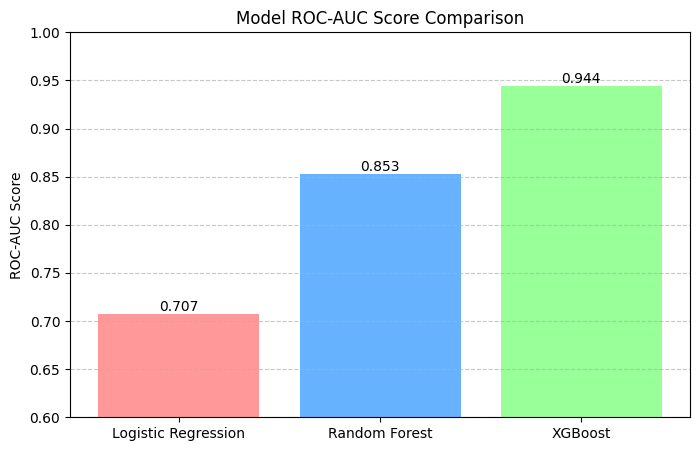

In [59]:
import matplotlib.pyplot as plt

models = ["Logistic Regression", "Random Forest", "XGBoost"]
roc_auc_scores = [
    roc_auc_score(y_test, y_pred_best_LR),
    roc_auc_score(y_test, y_pred_Rf),
    roc_auc_score(y_test, y_pred_best_xgb)
]

plt.figure(figsize=(8,5))
bars = plt.bar(models, roc_auc_scores, color=["#FF9999", "#66B2FF", "#99FF99"])
plt.ylim(0.6, 1.0)
plt.ylabel("ROC-AUC Score")
plt.title("Model ROC-AUC Score Comparison")
plt.grid(axis="y", linestyle="--", alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f"{height:.3f}", ha="center", va="bottom", fontsize=10)

plt.show()


### 📈 **ROC-AUC Score Comparison**

This chart visually compares the ROC-AUC scores of the tested models:

- **XGBoost**: Highest ROC-AUC (~0.94), showing superior ability to distinguish between defaulters and non-defaulters.
- **Random Forest**: Good performance (~0.85), balanced for both classes.
- **Logistic Regression**: Lower ROC-AUC (~0.71), indicating reduced ability to separate classes effectively.

✅ **Conclusion**: XGBoost clearly outperforms other models, making it the optimal choice for credit risk prediction.


## **Threshold Tuning, Final Evaluation & Feature Importance**

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report, roc_auc_score
from xgboost import plot_importance

**Threshold Tuning**

In [61]:
y_pred_proba = best_model_xgb.predict_proba(X_test)[:,1]
prec, rec, thresh = precision_recall_curve(y_test, y_pred_proba)

**Results (Threshold Tunning)**

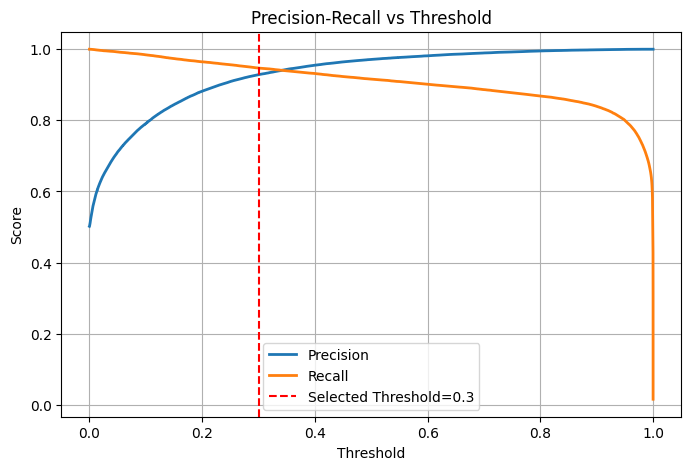

In [63]:
plt.figure(figsize=(8,5))
plt.plot(thresh, prec[:-1], label="Precision", linewidth=2)
plt.plot(thresh, rec[:-1], label="Recall", linewidth=2)
plt.axvline(x=0.3, color='red', linestyle='--', label='Selected Threshold=0.3')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


**Lowering threshold to 0.3 improves recall for defaulters, enabling better risk detection.**

#### **Final Threshold Evaluation**

In [64]:
final_threshold = 0.3
y_pred_final = (y_pred_proba >= final_threshold).astype(int)

In [65]:
print("\nClassification Report (Threshold=0.3):")
print(classification_report(y_test, y_pred_final))
print("Test ROC-AUC:", roc_auc_score(y_test, y_pred_final))


Classification Report (Threshold=0.3):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     41838
           1       0.93      0.95      0.94     42147

    accuracy                           0.94     83985
   macro avg       0.94      0.94      0.94     83985
weighted avg       0.94      0.94      0.94     83985

Test ROC-AUC: 0.9366407238198432


#### **Feature Importance**

<Figure size 1000x600 with 0 Axes>

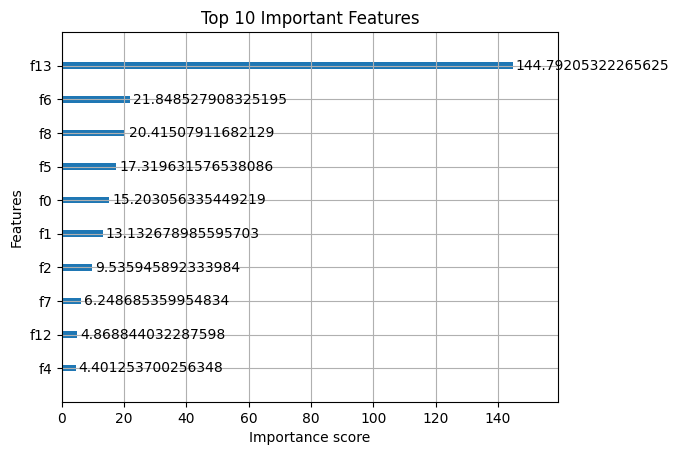

In [67]:
plt.figure(figsize=(10,6))
plot_importance(best_model_xgb, max_num_features=10, importance_type='gain')
plt.title("Top 10 Important Features")
plt.show()

####  **Key Features Driving Default Risk**

The following features have the highest impact in predicting borrower default risk, according to the tuned XGBoost model:

- **DebtRatio** — higher debt ratio increases the risk of default  
- **RevolvingUtilizationOfUnsecuredLines** — high utilization indicates higher risk  
- **MonthlyIncome** — lower income increases risk  
- **NumberOfOpenCreditLinesAndLoans** — more open accounts can indicate higher risk exposure  
- **Age** — younger borrowers tend to have higher default risk

These insights help prioritize monitoring and flagging high-risk borrowers.


# **Final Conclusion**

- **Best Model**: Tuned **XGBoost** with threshold adjustment (0.3).  
- **Key Features Driving Default Risk**:  
  - High `DebtRatio`  
  - High `RevolvingUtilizationOfUnsecuredLines`  
  - Low `MonthlyIncome`  
  - Younger `Age`  
  - More `Dependents`


📌 **Business Impact**:  
- By flagging high-risk borrowers in advance, banks can **minimize losses** and **improve lending decisions**.  
- Threshold tuning allows the institution to **prioritize recall**, ensuring risky borrowers are not overlooked.  


🚀 **Future Improvements**:  
- Use advanced resampling methods (SMOTE/ADASYN).  
- Apply SHAP values for explainability.  
- Retrain periodically with updated borrower data.    
